In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import seaborn as sns
import pickle, gzip
from mpl_toolkits.axes_grid1 import ImageGrid
from sklearn.cluster import KMeans

In [166]:
def get_data():
    with gzip.open('mnist.pkl.gz', 'rb') as fd:
        u = pickle._Unpickler(fd)
        u.encoding = 'latin1'
        train_set, valid_set, test_set = u.load()
        return train_set, valid_set, test_set

In [167]:
train_set, valid_set, test_set = get_data()

In [168]:
# combine train and val
train_set = (np.concatenate([train_set[0], valid_set[0]], axis=0), 
                np.concatenate([train_set[1], valid_set[1]], axis=0))

In [169]:
print("Size of training set:", len(train_set[0]))

Size of training set: 60000


In [170]:
print("Size of each training set item (28x28 image 1-d array): ", len(train_set[0][0]))

Size of each training set item (28x28 image 1-d array):  784


In [171]:
#Reshaping each 784 1-d array into 28x28 2-d array
train_set[0].reshape(60000,28,28).shape

(60000, 28, 28)

In [172]:
#Creating 4x4 grid of 10x10 patches
def patch_creation(image):
    patches = []
    x=[0,6,12,18]
    y=[0,6,12,18]
    for i in x:
        for j in y:
            patch = image[i:i+10,j:j+10].reshape(-1,100)
            patches.append(patch)
    return(patches)

In [173]:
def plot_image(test): 
    fig = plt.figure(figsize=(4., 4.))
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                     axes_pad=0.1,  # pad between axes in inch.
                     )

    for ax, im in zip(grid, [test[0].reshape(10, 10), test[1].reshape(10, 10), test[2].reshape(10, 10), test[3].reshape(10, 10),
                            test[4].reshape(10, 10), test[5].reshape(10, 10), test[6].reshape(10, 10), test[7].reshape(10, 10),
                            test[8].reshape(10, 10), test[9].reshape(10, 10),test[10].reshape(10, 10),test[11].reshape(10, 10),
                            test[12].reshape(10, 10), test[13].reshape(10, 10),test[14].reshape(10, 10),test[15].reshape(10, 10)]):
        # Iterating over the grid returns the Axes.
        ax.imshow(im, cmap='Greys_r')

    plt.show()

In [174]:
#this function is simply here to make sure that our grid creation works correctly
def test_image():
    #fetch one image
    image = train_set[0][1].reshape(28,28)
    
    print("Image shape: ",image.shape)
    
    #create 16 - 10x10 patches
    test = patch_creation(image)
    
    print("Num patches: ", len(test))
    
    #plotting the test image to see create patches
    plot_image(test)
    
    #plt.imshow(image.reshape(28, 28), cmap='Greys_r')
    

Image shape:  (28, 28)
Num patches:  16


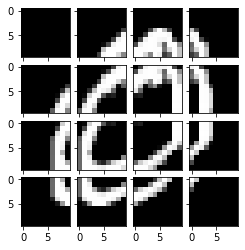

In [175]:
test_image()

In [176]:
#reshaping each 784 1-d array into 28x28 2-d array and creating patches for each image
training_patches=[]
for i in range(60000):
    image = train_set[0][i].reshape(28,28)
    training_patches.append(patch_creation(image))

In [126]:
print("Amount of training images: ", len(training_patches))

Amount of training images:  60000


In [127]:
print("Amount of matrices (patches) in each training image: ", len(training_patches[0]))

Amount of matrices (patches) in each training image:  16


In [128]:
#Choosing 1 patch from the 16 previously created for each image at random and appending to 
#training list
train_cluster=[]
for i in range(60000):
    n = random.randint(0, 15)
    train_cluster.append(training_patches[i][n])

In [129]:
#creates a list of 6000 numbers where each is between 0 - 59999
indices = random.sample(range(60000), 6000)

In [130]:
train_cluster[0].shape

(1, 100)

In [131]:
#appending randomly sampled patches using the previously created list of indices
train_cluster_sample=[]
for ind in indices:
    train_cluster_sample.append(train_cluster[ind])

In [132]:
print("Length of our randomly sampled patches: ", len(train_cluster_sample))

Length of our randomly sampled patches:  6000


In [133]:
train_cluster_sample[0][0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.04296

In [134]:
#creating a 6000x100 matrix of zeros that where each row will be one of our samples
training_matrix = np.zeros((6000,100))
for i in range(6000):
    #making eacch row a random patch
    training_matrix[i,:] = train_cluster_sample[i][0]

In [135]:
training_matrix[1,:]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.19921875, 0.9921875 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.57421875, 0.9921875 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.96875   , 0.9921875 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.234375  , 0.99609375,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.0078125 , 0.90625   ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.47265625,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00390625,
       0.        , 0.        , 0.        , 0.        , 0.     

In [136]:
# create kmeans object
kmeans = KMeans(n_clusters=50)
# fit kmeans object to data
kmeans.fit(training_matrix)
# print location of clusters learned by kmeans object
print(kmeans.cluster_centers_)
# save new clusters for chart
y_km = kmeans.fit_predict(training_matrix)

[[5.32285392e-02 4.46630271e-02 4.49454066e-02 ... 3.54103916e-01
  4.18580572e-01 3.42949925e-01]
 [4.02524227e-02 7.17318422e-03 3.97966425e-03 ... 1.07582469e-02
  1.25936032e-02 5.30907400e-02]
 [4.12528758e-01 2.99031825e-01 1.77626534e-01 ... 1.69430598e-02
  1.66315184e-02 1.94593558e-02]
 ...
 [5.74712644e-03 1.34698276e-03 6.10632184e-03 ... 4.05307112e-01
  2.79409124e-01 2.63469828e-01]
 [1.39183859e-02 4.93021845e-04 1.66533454e-16 ... 5.18507282e-01
  6.35163835e-01 5.76835558e-01]
 [3.73466706e-02 2.98627336e-02 1.20473131e-02 ... 1.62091121e-02
  2.16121495e-02 2.96801986e-02]]


In [137]:
training_matrix_60k = np.zeros((60000,100))
for i in range(60000):
    training_matrix_60k[i,:] = train_cluster[i][0]

In [138]:
y_km_60k = kmeans.fit_predict(training_matrix_60k)

In [139]:
np.unique(y_km_60k)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
      dtype=int32)

In [140]:
cluster_dict=[]
for i in range(50):
    subtrain_matrix = training_matrix_60k[y_km_60k==0,:]
    kmeans_sub = KMeans(n_clusters=50)
    kmeans_sub.fit(subtrain_matrix)
    y_km_sub = kmeans_sub.fit_predict(subtrain_matrix)
    cluster_dict.append(y_km_sub)

In [142]:
def pad_with(vector, pad_width, iaxis, kwargs):
    pad_value = kwargs.get('padder', 0)
    vector[:pad_width[0]] = pad_value
    vector[-pad_width[1]:] = pad_value

In [154]:
def patch_b(image):
    patches16 = []
    x_ = [0, 1, 2]
    y_ = [0, 1, 2]
    x=[0,6,12,18]
    y=[0,6,12,18]
    for i in x:
        for j in y:
            patches9 = []
            for k in x_:
                for l in y_:
                    patch = image[i+k:i+k+10, j+l:j+l+10].reshape(-1,100)
                    patches9.append(patch)
            patches16.append(patches9)
    return patches16

In [159]:
testing_patches = []
for i in range(10000):
    testing_reshaped = test_set[0][i].reshape(28,28)
    testing_padded = np.pad(testing_reshaped, 1, pad_with)
    testing_patched = patch_b(testing_padded)
    testing_patches.append(testing_patched)

In [164]:
print("Shape of padded image: ", testing_padded.shape)
print("Number of original patches: ", len(testing_patched))
print("Number of recentered patches per original patch: ", len(testing_patched[0]))
print("Total number of patches for each image: ", len(testing_patched) * len(testing_patched[0]))

Shape of padded image:  (30, 30)
Number of original patches:  16
Number of recentered patches per original patch:  9
Total number of patches for each image:  144
